> **Lab 5**:
>
> - Konstantinos Konstantinidis AEM:2546 konkonstant@uth.gr

1. Cluster Analysis
1. K-means Clustering
1. Interpreting Results

\begin{exercise}
1) Apply the the k-means described below and sklearn algorithm for clustering the data set "priorities_perifereion.xlsx'
2) Repeat 1) using hierarchical clustering algorithm and compare the two methods
included in the file.
\end{exercise}



## Implementing K-Means

* See a very basic example of K-means applied to a clear data set
* Work through an implementation of predicting the classes in the iris data set
* Application to data we're using

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


data= pd.read_excel("priorities_perifereion.xlsx")
data=data.T
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]
data.drop(data.index[:1], inplace=True)
cols=data.V1


### K-Means with good data

First things first, let's look at a readable and good application of kmeans with made up data:

In [2]:
# load modules
from sklearn import cluster
from numpy import random
from pandas import DataFrame, concat
from matplotlib import pyplot as plt
import pandas as pd






A quick scatter shows that yes, these are easy identifiable clusters.

Printing cls returns two arrays and a float.
The first array is 'x' and 'y' for the centrioids of each cluster.
The second array is the cluster values.
The float represents the inertia.

What happens when we introduce a new length of cluster?

In [3]:
## Iris Data Application
from sklearn import datasets
data= pd.read_excel("priorities_perifereion.xlsx")
#data=data.T
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]
data.drop(data.index[:1], inplace=True)

X=data.iloc[ :,1: ]
cls = cluster.k_means(X, 4)
print (cls)

(array([[6.66666667e-01, 3.33333333e-01, 6.66666667e-01, 6.66666667e-01,
        1.00000000e+00, 0.00000000e+00, 3.33333333e-01, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 6.66666667e-01,
        6.66666667e-01],
       [8.80000000e-01, 8.40000000e-01, 9.60000000e-01, 9.60000000e-01,
        1.00000000e+00, 9.20000000e-01, 9.20000000e-01, 9.20000000e-01,
        9.20000000e-01, 9.60000000e-01, 9.60000000e-01, 9.60000000e-01,
        9.60000000e-01],
       [1.11022302e-16, 1.11022302e-16, 2.85714286e-01, 1.42857143e-01,
        1.42857143e-01, 1.11022302e-16, 2.85714286e-01, 4.28571429e-01,
        2.85714286e-01, 1.42857143e-01, 1.42857143e-01, 5.71428571e-01,
        1.42857143e-01],
       [5.00000000e-01, 1.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        1.00000000e+00, 5.00000000e-01, 1.00000000e+00, 5.00000000e-01,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00]]), array([1, 1, 1, 1, 1, 1, 1, 1, 1,

Compare the results here. How did K-means do without any data changes?

Now calculate the Silhouette Coefficient for the total cluster.

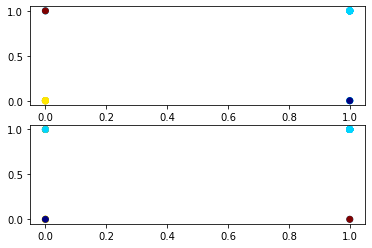

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.subplot(211)
plt.scatter(data["V2"], data["V3"], cmap=plt.cm.jet, c=list(cls[1]))
plt.subplot(212)
plt.scatter(data["V3"], data["V4"], cmap=plt.cm.jet, c=list(cls[1]))
plt.show()

In [5]:
from sklearn.metrics import silhouette_score

silhouette_score(X.values, cls[1])

0.43544240545166796

In [6]:
from sklearn.cluster import KMeans

kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(X.values)
print(y_kmeans5)

kmeans5.cluster_centers_

[4 0 0 4 4 0 2 4 4 4 2 1 0 3 3 4 4 4 4 1 4 2 1 2 4 0 1 4 1 1 1 4 4 4 4 0 4]


array([[8.33333333e-01, 1.66666667e-01, 6.66666667e-01, 6.66666667e-01,
        1.00000000e+00, 6.66666667e-01, 1.00000000e+00, 6.66666667e-01,
        1.00000000e+00, 8.33333333e-01, 6.66666667e-01, 1.00000000e+00,
        1.00000000e+00],
       [1.11022302e-16, 1.11022302e-16, 2.85714286e-01, 1.42857143e-01,
        1.42857143e-01, 1.11022302e-16, 2.85714286e-01, 4.28571429e-01,
        2.85714286e-01, 1.42857143e-01, 1.42857143e-01, 5.71428571e-01,
        1.42857143e-01],
       [2.50000000e-01, 1.00000000e+00, 7.50000000e-01, 5.00000000e-01,
        1.00000000e+00, 7.50000000e-01, 7.50000000e-01, 7.50000000e-01,
        0.00000000e+00, 1.00000000e+00, 5.00000000e-01, 2.50000000e-01,
        7.50000000e-01],
       [5.00000000e-01, 5.00000000e-01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e-01,
        5.00000000e-01],
       [1.00000000e+00, 1.00000000e+

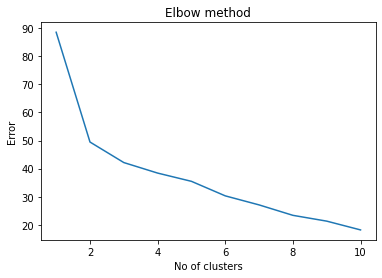

In [7]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X.values)
    kmeans.fit(X.values)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## Hierarchichal clustering

PERIFEREIES                         KRITI
Unnamed: 2     ANATOLIKI MAKEDONIA-THRAKI
Unnamed: 3                         ATTIKI
Unnamed: 4                  VOREIO AIGAIO
Unnamed: 5                  DYTIKI ELLADA
Unnamed: 6               DYTIKI MAKEDONIA
Unnamed: 7                         IPIROS
Unnamed: 8                      THESSALIA
Unnamed: 9                    IONIA NISIA
Unnamed: 10            KENTRIKI MAKEDONIA
Unnamed: 11                  NOTIO AIGAIO
Unnamed: 12                  PELOPONNISOS
Unnamed: 13                 STEREA ELLADA
Name: V1, dtype: object


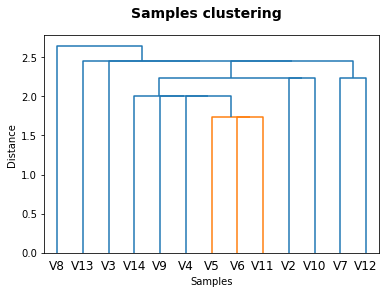

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

data_array = X
data_array = data_array.transpose()
print(cols)

data_dist = pdist(data_array) # computing the distance
data_link = linkage(data_dist) # computing the linkage


dendrogram(data_link,labels=X.columns)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14);

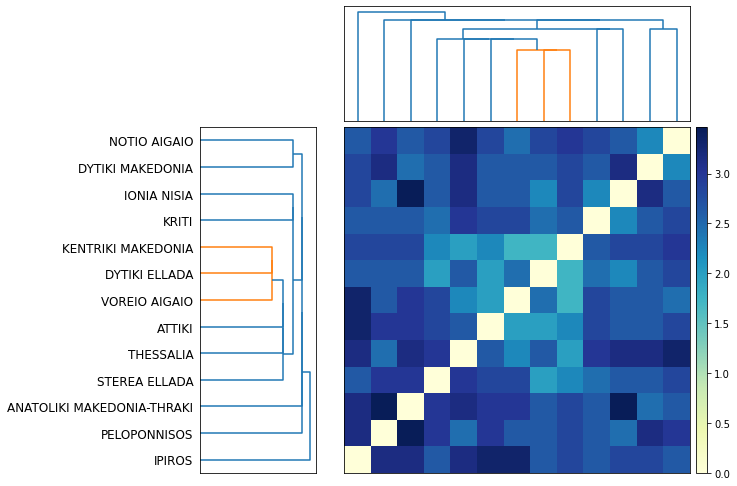

In [9]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='single')
Z1 = dendrogram(Y, orientation='right',labels=cols) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)